# Modern Data Science 
**(Module 02: Data Visualization)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au), Australia

---


# Session O - Event Handling

In this chapter, we'll begin looking into how we can do more with matplotlib than just simply creating a bunch of static visualizations. Specifically, in this lesson, we'll be looking into the built-in interactivity that matplotlib provides, and in addition, we'll also see how we can take advantage of matplotlib's event handling API to insert our own code into our chosen backend's event loop so we can achieve much of the same functionality that some of the more popular browser-based visualization libraries provide.

Now, this is usually the point in the lesson where I would say something like "let's go ahead and get started by running the standard setup code", but in this case, that code is not so standard.

If you take a look at the code in the next cell, everything should look pretty familiar to you, with the exception of the very first line. On line 1, we're calling the `%matplotlib` magic command, as we always do to set up our notebook, however, we would normally pass in the `inline` parameter here to specify that we want to setup our notebook for displaying matplotlib figures inline. In this lesson though, we'll be using the brand new `notebook` option that was added in matplotlib version 1.4. This new option works with IPython version 3 or higher, but if you're running an earlier version, you can still get the same functionality, you'll just need to pass in the `nbagg` option instead of `notebook`.

What the `notebook` option does is use the new `NBAgg` backend created by Phil Elson to enable interactive figures in a Jupyter notebook. Using this option we will be able to use nearly all of the interactive features that matplotlib supports all from within our Jupyter notebook. 

So, let's go ahead and run the setup code below to get our notebook ready to display interactive versions of our matplotlib plots inline.

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/style/core.py:203: UserWarning: In /home/dsxuser/.config/matplotlib/stylelib/my_custom_style.mplstyle: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(message)


Now that we have everything setup, let's start off with a simple plot of some random data to give us something to play around with. The next cell plots some random, normally distributed data onto a 2-dimensional scatterplot the purpose of experimentation.

<IPython.core.display.Javascript object>


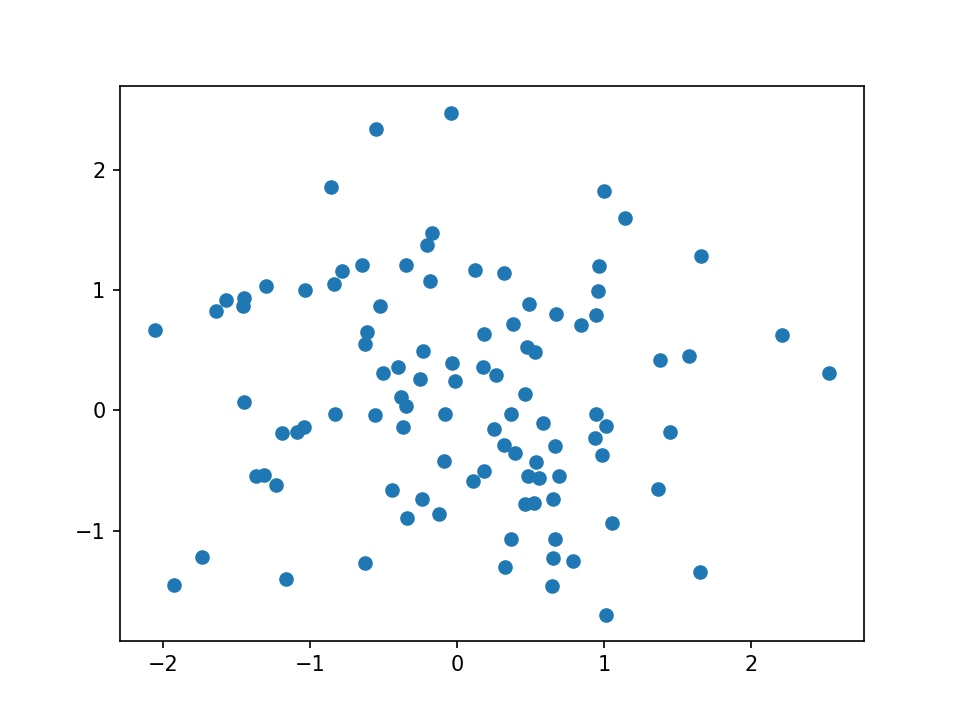

In [2]:
plt.scatter(np.random.randn(100), np.random.randn(100));

## Built-in Functionality

The very first thing to notice here, is that our figure looks a bit different. It now has some sort of title bar across its top, with what looks like a power button at its right edge, and along the bottom left edge, it now has a series of buttons. These buttons are where we will find the majority of the interactivity that the `NBAgg` backend provides, but let's ignore these right now, and instead just try mousing over the figure itself.

Notice, that as soon as the cursor enters the figure, a pair of x and y coordinates show up at the bottom right edge of our plot. This readout updates with every movement of the mouse allowing us to see the actual values of a particular data point in our graph by simply hovering over it. 

Now, let's move onto those buttons and see what they can do for us. As you mouse over the buttons, you'll see a description of what each button can do to the right, where the x and y coordinates were displayed before. Let's click on the fourth button in the group, the one with the cross in it. This is the pan and zoom button. Clicking on this one will allow you to click on an area of the graph and drag it around the screen (i.e., panning) and right-click (or, two-finger-click for Mac users) and drag to zoom in and out. Play around with the panning and zooming functionality a bit to get a feel for it.

The next button in the group, the one with the empty square, is the zoom to rectangle button. This mode allows you to draw a rectangle around an area of the graph that you want to zoom in on. Go ahead and give it a try now, to see how it works.

Now, that we've played around with our graph a bit, we may have left ourselves in a state that we don't want to be in. That's where the first three buttons come into play. We can use the second and third buttons to move back and forth through each view we've just created, just like you would with a web browser. And, the first button will reset the graph entirely.

Finally, the last button in the group, the one with the floppy disk---a device most of you probably haven't even seen in real life---is the save button, and clicking it will allow you to download a copy of the plot to your local hard drive.

Aside from that, the only thing left is that power button at the top. Clicking on that will turn off all of the interactive features of the plot. I'd be careful clicking on that one though. Once you click it, there's no going back without running the code in the cell again.

## Event Handling

Having the ability to pan and zoom is all well and good, but wouldn't it be great if you could respond to things like mouse clicks and key presses? Well, fortunately, you can through the extensive [events API][1] that matplotlib provides, and hooking your code into the event loop is super simple. Just call the [`mpl_connect`][2] method from the current figure's canvas object and pass in the name of an event and a callback function and you're all set up to handle that event. When the specified event occurs, your callback function will be called and it will be passed one of several [`matplotlib.backend_bases.Event`][3] objects specific to the type of event your callback function is handling.

### Handling Mouse Buttons Events

As an example of the events API in action, we're going to create a figure that will allow us to plot some random data by simply clicking on a point in the graph. Let's start by creating our callback function.

The code in the next cell creates a handler function that takes a `matplotlib.backend_bases.Event` object, specifically, an instance of the `matplotlib.backend_bases.MouseEvent` class, and will use the x and y coordinates where the user clicked to plot a handful of normally distributed, random data points. One thing to notice is that we check which button was clicked before plotting the points, and we only do so if the left mouse button was clicked, i.e., button 1.

[1]: http://matplotlib.org/users/event_handling.html
[2]: http://matplotlib.org/api/backend_bases_api.html#matplotlib.backend_bases.FigureCanvasBase.mpl_connect
[3]: http://matplotlib.org/api/backend_bases_api.html#matplotlib.backend_bases.Event

In [3]:
def button_press_handler(event):
    if event.button == 1:
        sigma = 0.05
        n = 10
        xs = sigma * np.random.randn(n) + event.xdata
        ys = sigma * np.random.randn(n) + event.ydata
        plt.plot(xs, ys, 'bo')

Then, we'll create a new `Figure` object, grab that figure's axes object, and use it to make a couple of changes to our plot. First, for purely aesthetic purposes, we'll turn on the grid lines for the plot. Then, and this is the most important piece, we'll turn off auto scaling. The reason for doing this is that, with auto scaling on, the graph will go nuts rescaling itself to fit all of our data points as tightly as possible. 

After that, we'll get the canvas object from our figure and call the `mpl_connect` method to register our callback function with the button press event.

Now, if we run the code below, we should get an empty plot that will allow us to add data points to it by picking a point around which our callback function will randomly place a small number of data points.

<IPython.core.display.Javascript object>


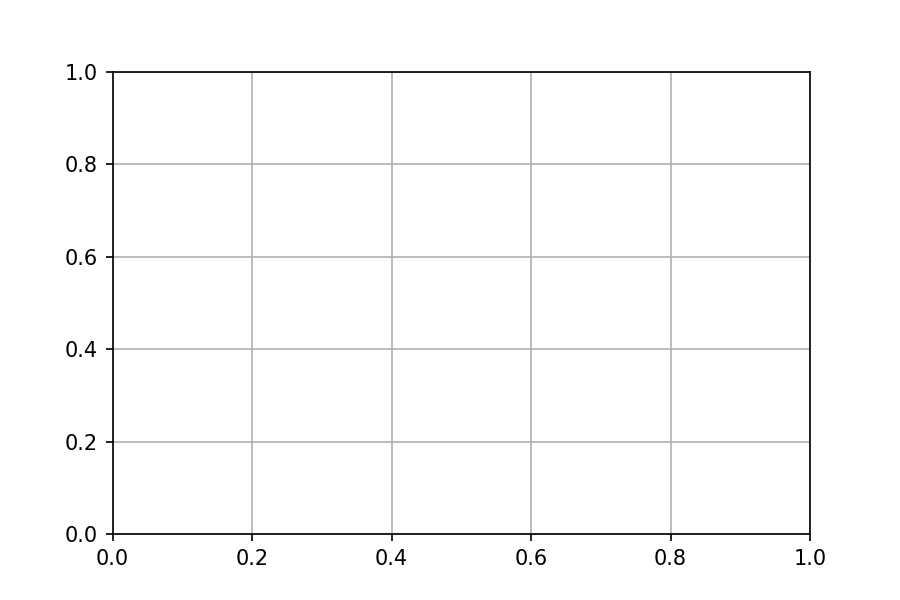

In [5]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()
ax.grid('on')
# If we don't turn this off, the graph will go nuts scaling 
# itself nearly every time we add a few more points.
ax.set_autoscale_on(False)

# Connect the event listeners to the 
fig.canvas.mpl_connect('button_press_event', button_press_handler)

plt.show()

And, that's really all it takes to add a bit of event handling to our plots, but we're not done just yet.

### Ignoring Mouse Events Outside of Normal Mode

Though our button press event handler works fairly well, we do have one major problem with the figure above. If we click on one of the built-in interactivity buttons, like the pan and zoom, or zoom to rectangle buttons, and try to use the chosen functionality in our graph, it will work, but we'll also end up plotting some data points everywhere we click. What we really want is to ignore all clicks when anything other than normal mode is turned on. To do that, we'll need to grab a reference to the toolbar, so we can check what mode we're in. 

The following code is exactly the same event handler as above, but we added a few extra lines to prevent us from plotting points when using one of the built-in modes. On line 4, we get a reference to the toolbar from the current figure manager. Then, on line 5, if anything other than normal mode (i.e., no mode) is selected, we simply exit the handler, otherwise, we plot some data points.

In [6]:
def button_press_handler(event):
    # Get the toolbar and make sure that we are not in zoom or pan mode. 
    # If we are, just exit without doing anything
    toolbar = plt.get_current_fig_manager().toolbar
    if toolbar.mode != "":
        pass
    elif event.button == 1:
        sigma = 0.05
        n = 10
        xs = sigma * np.random.randn(n) + event.xdata
        ys = sigma * np.random.randn(n) + event.ydata
        plt.plot(xs, ys, 'bo')

So, we've now fixed our problem, but why not add one more bit of functionality while we're at it.

### Handling Key Press Events

In the next cell, we'll create another handler function, this time for key press events. In our handler, we'll check if the user has pressed the 'r' key (for regression), and if so, we'll gather all of the data points from the axes object, perform a linear regression on the data points, and plot the resultant line. 

In [7]:
def key_press_handler(event):
    if event.key.lower() == 'r':
        ax = plt.gca()
        xs = [x for l in ax.lines for x in l.get_xdata()]
        ys = [y for l in ax.lines for y in l.get_ydata()]
        m, b = np.polyfit(xs, ys, 1)
        xs = np.linspace(*plt.xlim(), num=2)
        plt.plot(xs, m*xs+b, 'r--')

Now, we just need to run the same code as we did above to create our plot, this time though, we'll connect both event handlers to their respective events. So, let's run it now and see how it works.

<IPython.core.display.Javascript object>


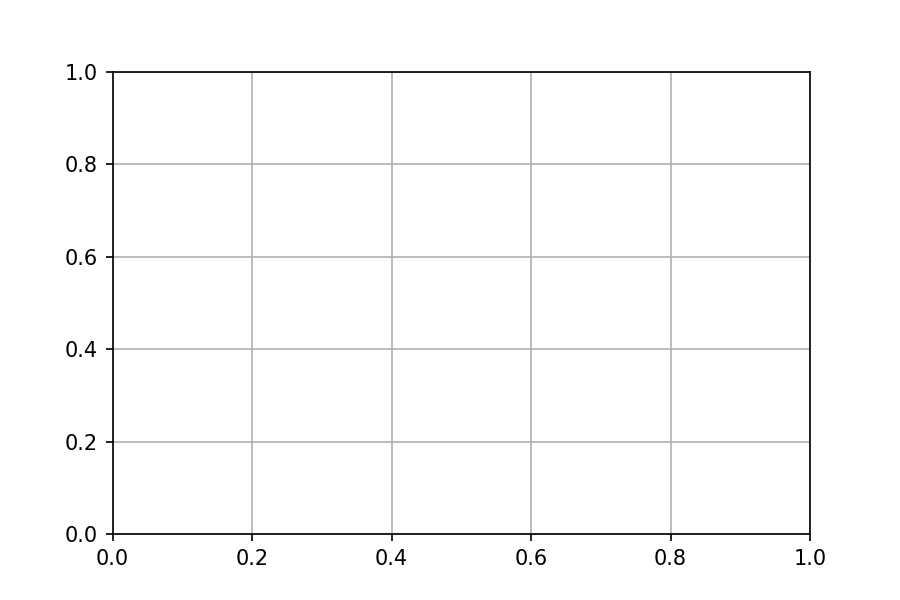

In [9]:
fig = plt.figure(figsize=(6, 4))

ax = fig.gca()
ax.grid('on')
# If we don't turn this off, the graph will go nuts scaling 
# itself with the first couple of points chosen.
ax.set_autoscale_on(False)

# Connect the event listeners to the 
fig.canvas.mpl_connect('button_press_event', button_press_handler)
fig.canvas.mpl_connect('key_press_event', key_press_handler)

plt.show()

And, of course, you remembered to close all of the figures you've created along the way, right?

In [10]:
plt.close('all')

---
## ipywidgets

The ability to plot data onto static graphs and images is a powerfully useful tool on its own, but if you use matplotlib long enough, you'll eventually reach a point when you want to interact with the data in your plots. In this lesson, and the next, we'll use the `ipywidgets` library that comes with IPython to create simple, yet effective interfaces that we can use to tweak the plots we're generating with matplotlib. 

So, let's go ahead and setup our notebook and take a look at an example where some interactivity would come in handy.

<!---So, let's say you're plotting some data that you've generated and you want to compare a few different results. The first thing you'd probably do is write a function that takes a few parameters allowing you to tweak the results, right? You still have a problem though, specifically, how do you quickly and easily plot several different runs of your function? Well, if you're doing everything in a Jupyter notebook, you could have a separate cell for each set of parameters, but that's a bit cumbersome and doesn't allow you to work interactively with your data. What you'd really like to do is hook up a handful of UI components, e.g., sliders, text boxes, and radio buttons, to your function and use that to tweak the plotted results. Lucky for you, IPython comes with a fantastic library called `ipywidgets` that provides some straightforward, and powerful tools for wrapping your functions in a simple UI --->

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

### Use Case: Investing

So, let's assume that you've just received a lump sum of money---for sake of argument, let's say you just got your annual bonus---and now you want to save your newfound fortune for retirement. To pick out the right investment vehicle for your recent windfall, you'll need to analyze the future value of your investment given a handful of variables. The formula for doing this is simple, and if you're interested, you can read over the Wikipedia article on [compound interest][1] for more details on the equation that we'll use in the next cell to create the future value function, or `fv` for short. 

[1]: https://en.wikipedia.org/wiki/Compound_interest

In [12]:
def fv(p, i, n, t):
    """Returns the future value of an investment
    
    Arguments:
    p -- Initial investment (i.e., present value)
    i -- Interest rate
    n -- Number of times investment is compounded per year
    t -- Total time (in years) of the investment
    """
    return p * (1 + float(i)/n)**(n * t)

And now, let's try out our function to see what it gives us for an investment of, say, \$10,000 in 10-year Treasury Bonds that have historically yielded an [average compound rate (from 2006-2015)][1] of 4.7%.

[1]: http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html

In [14]:
print("${:,.2f}".format(fv(10000, 0.0471, 1, 10)))

$15,844.61


Well, that's not too bad, in just 10 years we've turned our \$10,000 investment into a little over \$15k. But, now let's assume I want to see how that investment looks over the full term of the investment. In other words, I'd like to see a plot of the value of my investment for each year that I have the money invested. 

The `plot_fv` function in the next cell takes the same set of parameters as our `fv` function and uses the `fv` function to calculate the return for every year. Then it plots the future value for each year onto a simple line graph.

In [15]:
def plot_fv(p, i, n, t):
    """Plots the value of an investment over time
    """
    # We add 1 to the range of years, so we include the initial
    # investment in our list as well.
    fvs = [fv(p, i, n, year) for year in range(t+1)]
    plt.plot(fvs)

Now, let's give our `plot_fv` function a try with the same set of values that we used in the previous example for 10-year T-Bonds, but this time let's push the time period of our investment out to 30 years.

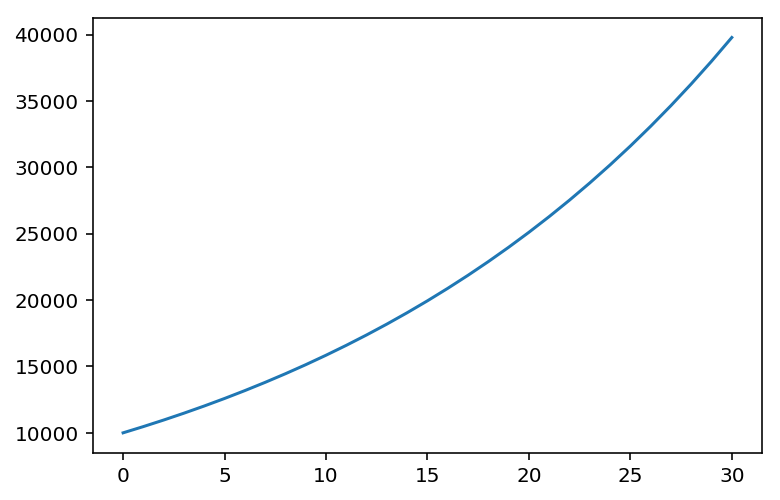

In [16]:
plot_fv(10000, 0.0471, 1, 30)

Hmm, well, going from \$10k to \$40k over the course of 30 years is better than nothing, but to be perfectly honest, I was really hoping to see a slightly better return on my investment. 

The nice thing about this example though, is that we have a handful of parameters that we can tweak to change the output of the equation, so we can play around with the variables a bit to find the best place to stash our cash. That said, plotting the outcome of each combination of parameters in a separate cell can get a bit cumbersome. I don't know about you, but I'd prefer just adjusting a few sliders, or filling in a text box or two to get a new plot. Luckily, the [`ipywidgets`][1] library that comes with IPython allows us to do just that. 

[1]: http://nbviewer.ipython.org/github/ipython/ipywidgets/blob/master/examples/notebooks/Index.ipynb

## Adding Some Interactivity

The next cell imports the `interact` function from the `ipywidgets` module. Personally, I find this function to be magical (in a good way) in what it can do, and many times, this will most likely be all that you need. So, let's import the `ipywidgets` module and give it a try.

In [17]:
import ipywidgets

The `interact` function creates simple graphical interfaces for functions based on a set of keword arguments that are passed to it when called. The result will be a user interface that you can interact with to modify the input to the underlying function. If, as with our `plot_fv` function, the output is a matplotlib plot, that plot will be updated with each parameter change. Sounds amazing right? Well, let's give it a try and see it in action.

The code in the next cell, calls the `interact` function and passes in our `plot_fv` function. Then we pass in a default values for each parameter in `plot_fv`. Doing so will allow the `interact` function to figure out a few things: first, the names of each of the parameters of the underlying function, second, the type of each parameter allowing it to choose the correct widget to represent each one, and finally, the default value for each parameter and corresponding widget. 

Now, let's run the code below to see it in action.

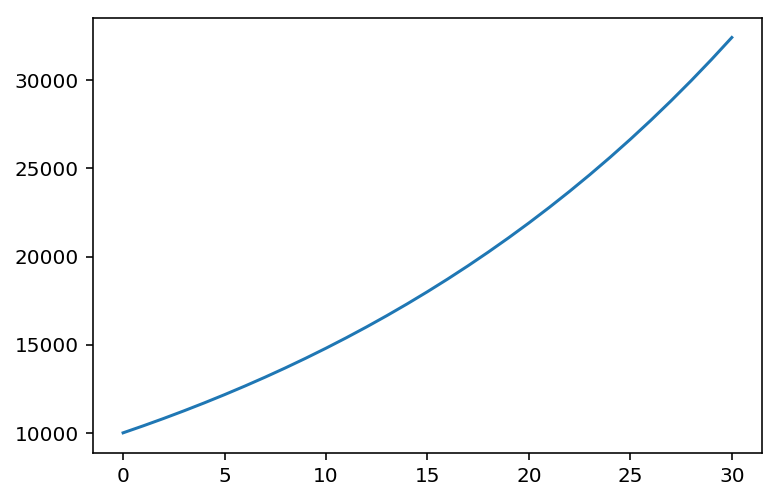

In [18]:
ipywidgets.interact(plot_fv, p=10000, i=0.04, n=1, t=30);

### Summary

Now, we can change things like the amount of our investment, or the interest rate that we'll earn, and immediately see the outcome of that change. This is fantastic, but what I really love most about the ipywidgets library, and more specifically the `interact` function, is that it's about the most "bang for your buck" you can get. As we've just seen, you simply call the `interact` function, pass in the function you want to interact with, and set some sensible defaults for the parameters of the underlying function, and you have an extremely useful interface---all with just one line of code. To make things even easier, we could've just used the `interact` function as a decorator on the `plot_fv` function instead of making a separate call to it later. 

Of course, the interface we created is not without problems. For example, it doesn't make much sense to invest a negative amount of money, and the interest rate selector doesn't give us much granularity at all. And, probably the most egregious behavior of the interface is the fact that you can choose 0 for the number of times the investment compounds per year---this just ends up throwing a division by zero error if you try it.

Fortunately, the `interact` function allows us to change the behavior of each individual UI element just by changing the information that we pass into it, and in the next lesson, we'll see just how to do that. We'll also see how to use some of the more advanced features of the ipywidgets library to refine our interface even more.

### Refine UI

In our last section, we saw how to use the ipywidgets `interact` function to create a simple interace around a function allowing us to play around with the parameters of that function and instantly visualize its output. While it's awesome that we can create a full interace with just one line of code, it wasn't, as you might have guessed, the most refined interface. However, in this lesson, we'll take a look at the tools the ipywidgets library gives us to create a much more polished UI for our plotting functions.

So, let's dive right in, and get the setup out of the way.

The use case we were working with was one in which we've received a large lump sum of money, and we want to pick out the right investment vehicle for our recent riches. To do that, we created two functions: the first calculates the future value of an investment, and the second plots the future value of an investment over several years. Both of these functions have been reproduced in the next cell, so let's go ahead and run it so we can continue from where we left off in our last lesson.

In [19]:
def fv(p, i, n, t):
    """Returns the future value of an investment
    
    Arguments:
    p -- Initial investment (i.e., present value)
    i -- Interest rate
    n -- Number of times investment is compounded per year
    t -- Total time (in years) of the investment
    """
    return p * (1 + float(i)/n)**(n * t)

def plot_fv(p, i, n, t):
    """Plots the value of an investment over time
    """
    # We add 1 to the range of years, so we include the initial
    # investment in our list as well.
    fvs = [fv(p, i, n, year) for year in range(t+1)]
    plt.plot(fvs)

### Sensible Limits

As I mentioned at the introduction, the problem we were left with at the end of our last lesson, is that the interface we created (with one line of code, mind you) was not the most polished. Specifically, we were left with two main issues. First, the limits of each parameter were poorly defined, e.g., we could choose negative values for each parameter, and in the case of the number of compounding periods, we could even end up with a division by zero error. Second, the granularity of some of the parameters was not quite what we wanted, specifically, we could only choose three different interest rates, and one of those was negative!

Fortunately, the `interact` function we used to create our interface allows us to fix these issues by passing in a tuple for each keyword argument where we can specify the minimum and maximum values of each slider, and optionally, a step value as well. 

In the next cell, we modify the previous call to `interact` to add some sensible limits, and refine the granularity of our interface a bit.

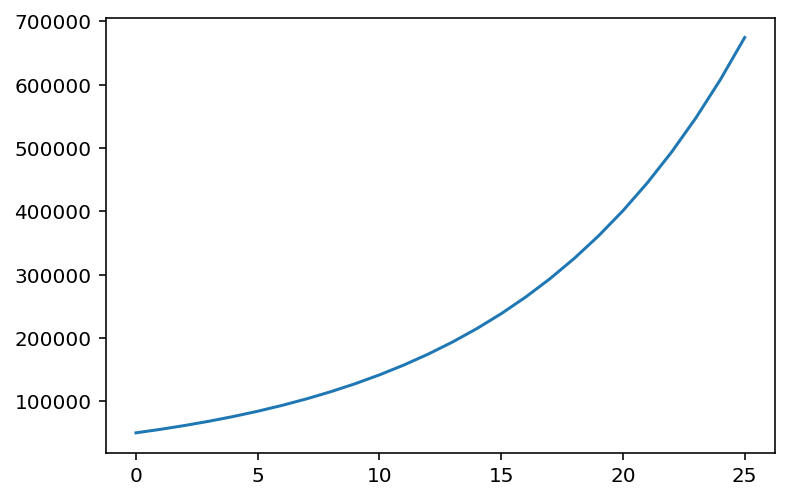

In [20]:
ipywidgets.interact(plot_fv, p=(0, 100000, 1000), i=(0.01, 0.2, 0.001), n=(1, 12), t=(1, 50));

### A Little Finer Control

Now, this is working much better than what we had at the end of our last lesson, but we still have a few more changes to make to really make our interface perfect. First, it would be great if the interface defaulted to the 10-year T-Bond info that we've been using all along. Second, those one character labels for each of the parameters, they probably aren't the easiest to understand, so it would be nice if they were a bit more verbose. Finally, we don't really need the plot to update as we're selecting a new value, it'd probably be a bit nicer if it only updated one time after we had chosen a new value for a parameter, so we'll need a way to stop the continuous updates as well.

To make all of these changes, we'll need to create our own widget objects instead of relying on the `interact` function to create them for us. Doing so is quite easy, just call the constructor for each widget and pass in the options you want as keyword arguments. 

In the next cell, we will set the min, max, step, and default values for each slider. We'll also give each one an easier to understand and more verbose label. Finally, we'll set the `continuous_update` parameter to `False` for each widget to make sure the plot only updates once we've selected a value. 

In [21]:
present_value = ipywidgets.IntSlider(min=0, max=100000, step=1000, value=10000, 
                                     description='Present Value', continuous_update=False)
interest_rate = ipywidgets.FloatSlider(min=0.01, max=0.2, step=0.001, value=0.047, 
                                       description='Interest Rate', continuous_update=False)
compounds_per_year = ipywidgets.IntSlider(min=1, max=12, value=1, 
                                          description='Compounds/Year', continuous_update=False)
years = ipywidgets.IntSlider(min=1, max=50, value=30, 
                             description='Years to Retirement', continuous_update=False)

Once we have each of the widgets created, we simply need to pass them into the `interact` function the same way that we did with the tuples in the previous example.

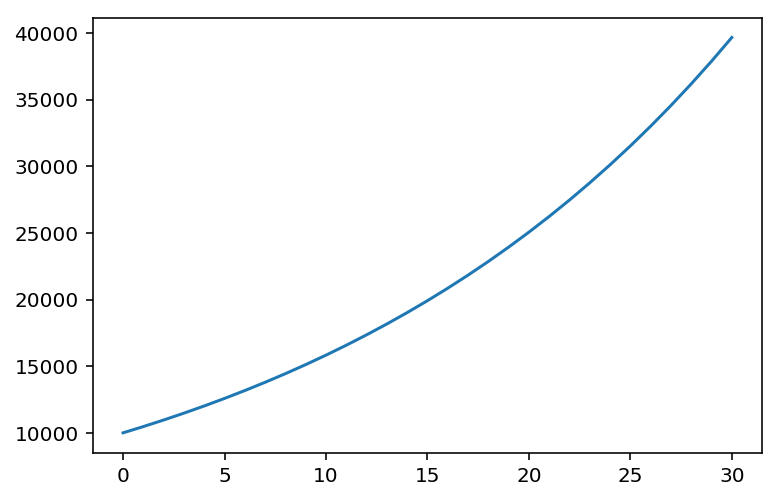

In [22]:
ipywidgets.interact(plot_fv, p=present_value, i=interest_rate, n=compounds_per_year, t=years);

### Making Comparisons 

Well, for just a smidgen more of work, we now have a simple, easy to understand, and easy to use interface for interacting with our `plot_fv` function. But, wouldn't it be nice if we could plot multiple curves on a single plot so we could compare each of the outcomes to find just the right investment? To do so, we just need to hold onto a figure object so we can update it rather than creating a new figure every time the `plot_fv` function is called.

In the next cell, we'll create a global `fig` variable that will hold a `Figure` object that we create with the `pyplot.figure` function. Then we'll redefine our `plot_fv` function to use the new `fig` object in place of the current figure when plotting new lines. This will result in the current plot being updated with new lines every time the `plot_fv` function is called, which will allow us to compare different sets of variables and their outcome. 

Aside from that, the only other difference can be seen on line 17 where we're adding a simple legend to the plot to make it a bit easier to make comparisons between each set of options.

In [23]:
from IPython.display import display

# Create a figure that we can update instead of creating a new figure 
# every time the plot_fv function is called.
fig = plt.figure()

def plot_fv(p, i, n, t):
    """Plots the value of an investment over time
    """
    # We add 1 to the range of years, so we include the initial
    # investment in our list as well.
    fvs = [fv(p, i, n, year) for year in range(t+1)]

    ax = fig.gca()
    ax.plot(fvs, label="p=%d, i=%2f, n=%d, t=%d" % (p, i, n, t))
    # Add a legend and make sure that it's outside of the plot
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    display(fig)

Then, just like we did above, we again create a set of widgets to be passed into the `interact` function. 

On a side note, we could actually just reuse the widgets we created for our last plot, but if we did, adjusting a slider in our new interface would also update that slider in the previous interface since they are both the same object. Now, there are times would you probably want the same widgets in different interfaces to be tied together, but in the current case, this isn't what we want, so instead we'll be creating brand new widgets for each parameter.

This time, we'll also do things a little differently as well. Notice in the code below, that we're only creating three widgets, we've purposely left off the years widget. The reason for the neglect of the years variable is that, now that we are plotting each line on the same plot, adjusting the number of years will lead to changes in the scale of the plot, which isn't fair for comparison, and frankly a little jarring as well. To account for the fact that the number of years is now fixed, we must use the `ipywidgets.fixed` function when calling `interact`, or as you've no doubt noticed, the `interactive` function. So, the big question then, as I already alluded to, is what is the difference between `interact` and `interactive`, and why are we now using the latter? 

Well, the main difference between the two is that the `interactive` function returns a container object that wraps all of the widgets and provides a way for us to get the current values of each. We'll see a use for this container object in the next cell, but for now let's just go ahead and run the code to create our new interface.

In [24]:
present_value = ipywidgets.IntSlider(min=0, max=100000, step=1000, value=10000, 
                                     description='Present Value:', continuous_update=False)
interest_rate = ipywidgets.FloatSlider(min=0.01, max=0.2, step=0.001, value=0.047, 
                                       description='Interest Rate:', continuous_update=False)
compounds_per_year = ipywidgets.IntSlider(min=1, max=12, value=1, 
                                          description='Compounds/Year:', continuous_update=False)
w = ipywidgets.interactive(plot_fv, p=present_value, i=interest_rate, n=compounds_per_year, t=ipywidgets.fixed(30))

The problem that we're going to tackle next is that of reseting the plot. Now that we can add multiple lines to our plot for comparison, we need a way to reset the plot whenever it gets a bit too cluttered. 

In the next cell, we'll create a button widget (with the label "Reset") and add a function to its `on_click` event that will clear the current figure object and the contents of the current cell, and then plot the current set of values in the interface. The first two actions are easy, simply call the `Figure.clf` function to clear the figure, and use the `clear_output` function provided by IPython's `display` module to clear the contents of the current cell. For the last bit though, we'll need to get the current set of values from our interface. Since we used the `ipywidgets.interactive` function in our last cell to create our interface, we have a container object that provides us with a simple interface for getting those values. You can see where we're getting the values using the `kwargs` variable and passing them into our `plot_fv` function on line 12 of our custom `clf` function below.

The last bit to notice is that we add our new `button` object to the container object returned by the call to `ipywidgets.interactive` in the previous cell. Doing so will make the button show up in the interface when you display it.

In [25]:
from IPython.display import clear_output

button = ipywidgets.Button(description="Reset")

# This function will clear the global figure object, clear the output
# of the current cell, and display a new plot with the current set 
# values from the interface.
def clf(*args, **kwargs):
    fig.clf()
    # If we don't call clear_output(), we end up with 2 plots
    clear_output()
    plot_fv(**w.kwargs)
    
button.on_click(clf)
w.children += (button,)

Now that we have our interface created, there's just one thing left to do: display the interface. To do that we simply call IPython's `display` function and pass in the container object we created earlier. 

Incidentally, the `display` function takes a variable number of objects, so if we hadn't added the button to our container object, as we did in the last cell, we could have simply tacked it onto the call to `display` below. The result would've been nearly identical, but one nice feature of adding the button to the container is that it fits into the interface a bit better. Adding the button to the container object will result in its dimensions being adjusted to fit the interface as well as the padding between it and the rest of the interface objects. Whereas, when passed into the `display` function directly, a bit more padding is added between it and the container object's widgets and it will also be expanded to fit the full length cell, which doesn't look as good, in my opinion.

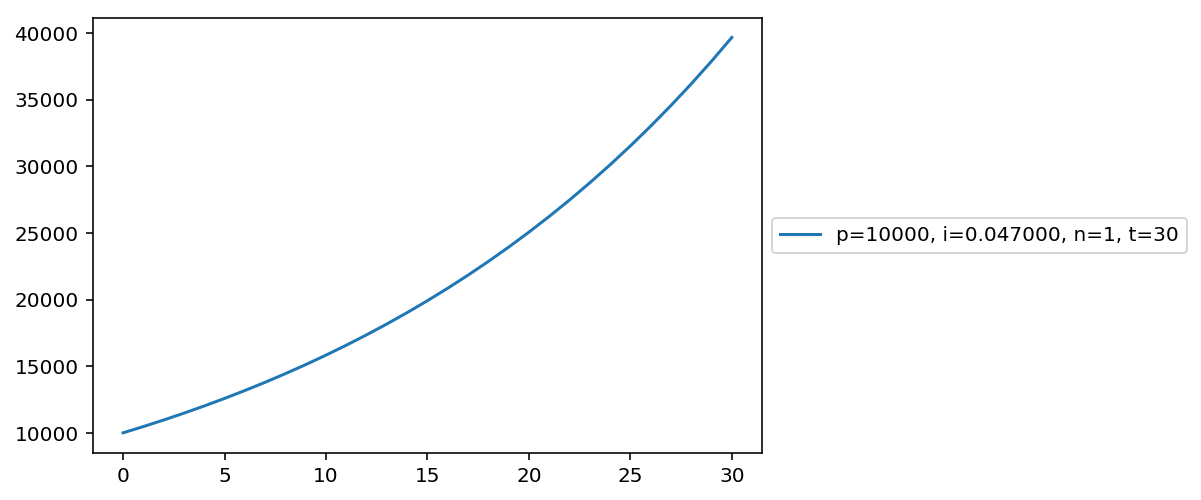

In [26]:
display(w)

### Cleaning Up

So, we now have a fully functional interactive interface to our plotting function. The last thing for us to do is to just tidy up the interface a bit more. The one thing that drives me a bit crazy about the interface is that the sliders and their labels are not lined up. By default, `ipywidgets` right aligns all labels and left aligns all widgets, so we should have a nicely aligned interface, but unfortunately, we've chosen labels that are longer than the hard minimum that `ipywidgets` uses. Luckily, the interface is just a set of HTML elements like anything else in a web page, so we can simply adjust each element's visual attributes using CSS like we would an interface in a normal web page. 

In the next cell, we use the `html` cell magic to add a bit of CSS to our page. The first line of CSS, line 3 below, increases the minimum width of the widget labels allowing everything to line up properly, and the second line adjusts the margins of the reset button to line it up with the sliders as well.

In [27]:
%%html
<style>
.widget-hbox .widget-label { min-width: 20ex }  /* Line up all of the sliders */  
.widget-area .btn { margin: 5px 0 0 22ex }      /* Line the button up with the sliders */
</style>

### Summary

And, that's going to bring us to the end of this lesson.

Over the past two lessons, we've seen how easy it is to create simple, effective, and easy to use interfaces for our plotting functions with just a few lines of code using the ipywidgets library. The nice thing about this library, aside from its power and ease of use, is that it comes standard with IPython. So, if you've installed the Anaconda distribution of python, as we did at the beginning of this course, you'll automatically have everything you need to create notebooks that make exploring your data, terribly easy.

## Conclusion

And, that's going to bring us to the end. 

In this lesson, we learned about the default interactivity that matplotlib provides for us right out of the box. We learned how to use this functionality, as well as other forms of interactivity in a Jupyter notebook by passing the `notebook`, or `nbagg`, option to IPython's `matplotlib` magic command. And, finally, we learned about event handling and we created a sample plot that handled both key press, and mouse button press events. There's still quite a few more events that you can listen for, we've really only scratched the surface of what the events API has to offer, so I encourage you to read through the [documentation][1] to see what all is possible. 

[1]: http://matplotlib.org/users/event_handling.html